In [1]:
from __future__ import print_function
# from keras import backend as K
import tensorflow as tf
mnist = tf.keras.datasets.mnist
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, BatchNormalization, Input, Dropout, concatenate
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import adagrad 
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *

epochs = 16
batch_size = 64
input_shape = (28,28,1)

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))


# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters = 32, kernel_size=(7,7), padding='Same', activation = 'relu', input_shape = (28,28,1)),
#   tf.keras.layers.BatchNormalization(),
#   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])
def inception_block(x, filters):
#     last = x
    
    net1 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)
    
    net2 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)
    net2 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net2)
    
    net3 = Conv2D(filters = filters, kernel_size=(1,1), padding='Same', activation = 'relu')(x)
    net3 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net3)
    net3 = Conv2D(filters = filters, kernel_size=(3,3), padding='Same', activation = 'relu')(net3)
    
    output = concatenate([net1, net2, net3], axis=3)
    return output

input_layer = Input(shape=input_shape)
x = Conv2D(filters = 32, kernel_size=(5,5), padding='Same', activation = 'relu')(input_layer)
x = Conv2D(filters = 32, kernel_size=(5,5), padding='Same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(5, 5), strides=(2,2))(x)

# last = x

x = inception_block(x,32)
x = MaxPool2D(pool_size=(5, 5), strides=(2,2),padding='Same')(x)

# x = MaxPool2D(pool_size=(3, 3), strides=(2,2))(x)
# x = inception_block(x,64)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

x = inception_block(x,64)
x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

# x = concatenate([x, last], axis=3)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1))(x)

# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(2,2),padding='Same')(x)

# x = Conv2D(filters = 256, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = Conv2D(filters = 256, kernel_size=(3,3), padding='Same', activation = 'relu')(x)
# x = MaxPool2D(pool_size=(3, 3), strides=(1,1),padding='Same')(x)

x = Flatten()(x)

# x = Dense(2048, activation=tf.nn.relu)(x)
# x = Dropout(0.5)(x)

x = Dense(1024, activation=tf.nn.relu)(x)
x = Dropout(0.5)(x)

x = Dense(128, activation=tf.nn.relu)(x)
x = Dropout(0.5)(x)

x = Dense(10, activation=tf.nn.softmax)(x)

model = Model(input_layer, x)
model.summary()

# optimizer = adagrad(lr=0.01)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   25632       conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization_v

In [5]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    shear_range = 3,
    zoom_range = 0.2,
    height_shift_range=0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=(x_test,y_test))
model.save_weights("mnist_temp2.h5")

Epoch 1/16
938/938 [==============================] - 28s 30ms/step - loss: 0.1401 - acc: 0.9630 - val_loss: 0.0611 - val_acc: 0.9822
Epoch 2/16
938/938 [==============================] - 28s 30ms/step - loss: 0.1250 - acc: 0.9682 - val_loss: 0.0888 - val_acc: 0.9766
Epoch 3/16
938/938 [==============================] - 28s 30ms/step - loss: 0.1119 - acc: 0.9710 - val_loss: 0.0604 - val_acc: 0.9827
Epoch 4/16
938/938 [==============================] - 29s 30ms/step - loss: 0.1013 - acc: 0.9737 - val_loss: 0.0446 - val_acc: 0.9865
Epoch 5/16
938/938 [==============================] - 29s 30ms/step - loss: 0.1027 - acc: 0.9738 - val_loss: 0.0514 - val_acc: 0.9858
Epoch 6/16
938/938 [==============================] - 29s 30ms/step - loss: 0.0917 - acc: 0.9765 - val_loss: 0.0378 - val_acc: 0.9892
Epoch 7/16
938/938 [==============================] - 29s 30ms/step - loss: 0.0886 - acc: 0.9775 - val_loss: 0.0292 - val_acc: 0.9916
Epoch 8/16
938/938 [==============================] - 29s 30ms

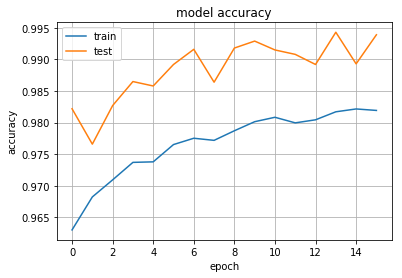

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.jpg")

plt.show()

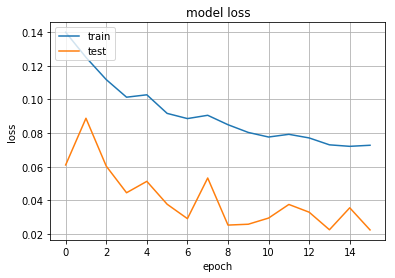

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.jpg")
plt.show()

In [9]:
pr =model.predict(x_test)

pred = []
for i in pr:
    x=np.argmax(i)
    pred.append(x)
pred = np.array(pred)

f1 = f1_score(y_test, pred, average="macro")

In [10]:
cm = np.array(confusion_matrix(y_test,pred),dtype = np.float32)
print(cm)
print(f1)

[[9.740e+02 0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.000e+00 1.000e+00]
 [0.000e+00 1.127e+03 2.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
  2.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.027e+03 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  4.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.004e+03 0.000e+00 4.000e+00 0.000e+00
  0.000e+00 2.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.770e+02 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 8.870e+02 1.000e+00
  1.000e+00 2.000e+00 0.000e+00]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00 9.490e+02
  0.000e+00 3.000e+00 0.000e+00]
 [0.000e+00 1.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.023e+03 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 9.720e+02 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00 1.0

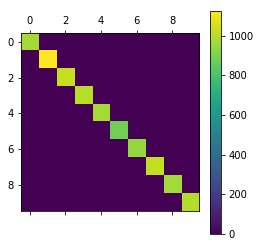

In [11]:
np.save("confusion_matrix.npy",cm)
plt.matshow(cm)
plt.colorbar()
plt.savefig("confusion.jpg")